# D209 Performance Assessment Task 1
## Darian Gurrola
## Course Instructor: Dr. Festus Elleh

## A1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The research question we will investigate is "Which factors are most responsible for predicting customer churn?".  We will answer this question by developing a K-Nearest Neighbors (KNN) algorithm.

## A2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The primary goal of this analysis is to create a K-Nearest Neighbors classification model and use it to identify customers at high risk of churn.

## B1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;K-Nearest Neighbors, or KNN, is a supervised learning algorithm that classifies data points into groups based on proximity to one another.  It can be used to predict what group a given data point, or query, belongs to.  KNN works by finding the distances between the query and all other data points, selecting the K-nearest data points closest to the query, and then voting for the most common group (Harrison, 2018).  I will use the KNN method to determine which telecommunications customers should be classified as at risk of churn.  The expected outcome of this analysis is to develop a model with at least 70% accuracy.  The industry standard for a machine learning model is typically between 70% and 90% accuracy (Hendricks).

## B2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The main assumption of K-Nearest Neighbors is that data points in close proximity to each other highly similar.  The shorter the distance between two data points, the more similar they are (IBM). 

## B3. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I used a variety of python libraries to develop and refine my K-Nearest Neighbors algorithm.  I used pandas to import and manipulate the churn dataset.  Numpy was used to perform basic calculations during the data cleaning process.  Seaborn was used to generate data visualizations and explore the data.  Matplotlib was used to plot the ROC curve and visualize the relationship between true positive and false positive rates.  Lastly, I imported a variety of methods from the Sklearn library to scale the data, select the best features for the model, build the initial KNN model, calculate model performance metrics, and perform hyperparameter tuning.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

## C1.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One of the preprocessing goals for this analysis is to clean the churn dataset.  This process will involve detecting and treating any duplicates, missing values, and outliers.  Data cleaning is required to produce consistent, structured, and accurate data for use in an analysis.  Failure to treat data quality issues could cause the classification model to produce misleading results and render any insights useless.  We must ensure that the data is reliable so that the model can achieve optimal accuracy.

## C2.

The variables below will be used to perform the analysis.

<ul>
    <li>Churn (Dependent Variable) - Categorical</li>
    <li>Population - Numerical</li>
    <li>Age - Numerical</li>
    <li>Children - Numerical</li>
    <li>Income - Numerical</li>
    <li>Gender - Categorical</li>
    <li>Email - Numerical</li>
    <li>Outage_sec_perweek - Numerical</li>
    <li>Yearly_equip_failure - Numerical</li>
    <li>Techie - Categorical</li>
    <li>Contract - Categorical</li>
    <li>InternetService - Categorical</li>
    <li>TechSupport - Categorical</li>
    <li>Monthly Charge - Numerical</li>
    <li>Item1 - Categorical</li>
    <li>Item2 - Categorical</li>
    <li>Item3 - Categorical</li>
    <li>Item4 - Categorical</li>
</ul>

## C3. 

Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data preprocessing is a necessary element in developing a KNN model because it transforms the data in a way that makes it compatible with machine learning algorithms.  For this analysis, I took various steps to prepare the data and ensure an accurate model.  My approach was to import the initial data, explore the data using summary statistics, detect and treat any data quality issues, re-express categorical variables, select features for the model, and lastly, scale the data.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I imported the initial data by using the pandas "read_csv()" method on the "churn_clean.csv" file.  The data was assigned to a pandas dataframe called "df_churn".  I printed the first five rows and the data types of "df_churn" to understand what the data looks before any manipulation took place.

In [2]:
df_churn = pd.read_csv('churn_clean.csv')

In [3]:
df_churn.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After importing the initial csv file, I decided to explore the data.  For the categorical variables, I used the "value_counts()" method and multiplied by 100 to obtain percentages for each category.  I used the "describe()" method on numerical variables to obtain basic statistical information such as the mean and standard deviation.

In [4]:
#Describe dependent variable, Churn, using percentages for categories
df_churn['Churn'].value_counts(normalize = True) * 100 

No     73.5
Yes    26.5
Name: Churn, dtype: float64

In [5]:
#Describe independent variable, Population
df_churn['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [6]:
#Describe independent variable, Age
df_churn['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [7]:
#Describe independent variable, Children
df_churn['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [8]:
#Describe independent variable, Income
df_churn['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [9]:
#Describe dependent variable, Gender, using percentages for categories
df_churn['Gender'].value_counts(normalize = True) * 100 

Female       50.25
Male         47.44
Nonbinary     2.31
Name: Gender, dtype: float64

In [10]:
#Describe independent variable, Email
df_churn['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [11]:
#Describe independent variable, Outage_sec_perweek
df_churn['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [12]:
#Describe independent variable, Yearly_equip_failure
df_churn['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [13]:
#Describe dependent variable, Techie, using percentages for categories
df_churn['Techie'].value_counts(normalize = True) * 100 

No     83.21
Yes    16.79
Name: Techie, dtype: float64

In [14]:
#Describe dependent variable, Contract, using percentages for categories
df_churn['Contract'].value_counts(normalize = True) * 100 

Month-to-month    54.56
Two Year          24.42
One year          21.02
Name: Contract, dtype: float64

In [15]:
#Describe dependent variable, InternetService, using percentages for categories
df_churn['InternetService'].value_counts(normalize = True) * 100 

Fiber Optic    44.08
DSL            34.63
None           21.29
Name: InternetService, dtype: float64

In [16]:
#Describe dependent variable, TechSupport, using percentages for categories
df_churn['TechSupport'].value_counts(normalize = True) * 100 

No     62.5
Yes    37.5
Name: TechSupport, dtype: float64

In [17]:
#Describe independent variable, MonthlyCharge
df_churn['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [18]:
#Describe dependent variable, Item1, using percentages for categories
df_churn['Item1'].value_counts(normalize = True) * 100 

3    34.48
4    33.58
2    13.93
5    13.59
1     2.24
6     1.99
7     0.19
Name: Item1, dtype: float64

In [19]:
#Describe dependent variable, Item2, using percentages for categories
df_churn['Item2'].value_counts(normalize = True) * 100 

3    34.15
4    34.12
5    13.68
2    13.60
1     2.17
6     2.15
7     0.13
Name: Item2, dtype: float64

In [20]:
#Describe dependent variable, Item3, using percentages for categories
df_churn['Item3'].value_counts(normalize = True) * 100 

3    34.35
4    34.10
2    14.24
5    13.13
6     2.03
1     2.02
7     0.12
8     0.01
Name: Item3, dtype: float64

In [21]:
#Describe dependent variable, Item4, using percentages for categories
df_churn['Item4'].value_counts(normalize = True) * 100 

4    34.52
3    34.30
2    13.50
5    13.35
1     2.21
6     2.03
7     0.09
Name: Item4, dtype: float64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step in my preparation process was to detect and treat data quality issues such as duplicates, missing values, and outliers.  I detected duplicates by combining the "duplicated()" and "value_counts()” methods from the pandas library and using them on "df_churn".  The output indicated that there were no duplicate rows in the data.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I then moved on to detecting missing values in the data. To do this, I used the "isnull()" method from pandas and the "sum()" method on "df_churn".  The output showed that there were no missing values in the dataset.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I detected outliers in the data by generating boxplots for each of the quantitative variables.  This was done using the "boxplot()" function from the seaborn library.   In addition to the visualizations, I created a function called "boxplot_info()".  This function accepts a feature from df_churn as an input and provides key information such as the number of outliers and the range of outlier values.  The resulting output showed that there were outliers in "Population", "Children", "Age", "Income", "Outage_sec_perweek", and "Yearly_equip_failure". 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After reviewing the boxplots for each numerical variable, I chose to retain all outliers.  This was because the values were plausible and in my opinion, not egregrious enough to exclude.  I also did not want to reduce the sample size or potentially introduce bias into the dataset. 

In [22]:
#Detect duplicate rows in df_churn 
print(df_churn.duplicated().value_counts())

False    10000
dtype: int64


In [23]:
#Detect missing values in df_churn
df_churn.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [24]:
#Create function to provide boxplot information
def boxplot_info(input):

    #obtain values of column and ignore nulls 
    data = input.dropna().values
    
    #calculate values of Q1 and Q3   
    q1 = input.quantile(0.25)
    print("Q1: " + str(q1))
    q3 = input.quantile(0.75)
    print("Q3: " + str(q3))
    
    #Calculate interquartile range for boxplot by subtracting Q1 from Q3
    iqr = q3 - q1
    print("IQR: " + str(iqr))
    
    #Calculate whisker values of boxplot. 
    whisker_lower = q1 - (1.5 * iqr)
    print("Lower Whisker: " + str(whisker_lower))
    whisker_upper = q3 + (1.5 * iqr)
    print("Upper Whisker: " + str(whisker_upper))
    
     #Find number of outliers outside of Q1 and Q3.  Print total number of outliers in column.  
    outliers_min = (input < whisker_lower).sum()
    print("Number of outliers lower than boxplot minimum: " + str(outliers_min))
    outliers_max = (input > whisker_upper).sum()
    print("Number of outliers greater than boxplot maximum: " + str(outliers_max))
    outliers_total = outliers_min + outliers_max
    print("Total number of Outliers: " + str(outliers_total))
    max_outlier = max(data)
    print("Maximum Value: " + str(max_outlier))
    min_outlier = min(data)
    print("Minimum Value: " + str(min_outlier))

Q1: 738.0
Q3: 13168.0
IQR: 12430.0
Lower Whisker: -17907.0
Upper Whisker: 31813.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 937
Total number of Outliers: 937
Maximum Value: 111850
Minimum Value: 0


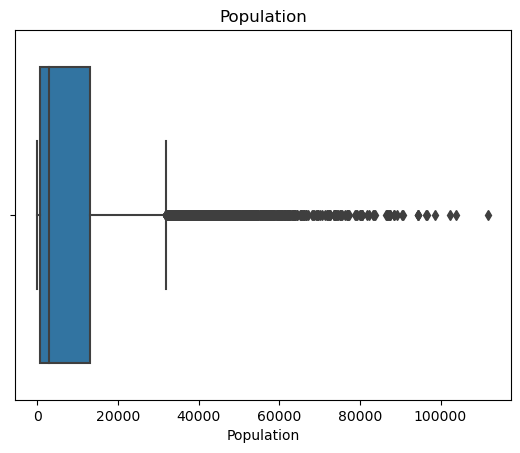

In [25]:
#Detect outliers in Population variable
population_boxplot = sns.boxplot(x="Population", data = df_churn).set_title("Population")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Population'])

Q1: 35.0
Q3: 71.0
IQR: 36.0
Lower Whisker: -19.0
Upper Whisker: 125.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 89
Minimum Value: 18


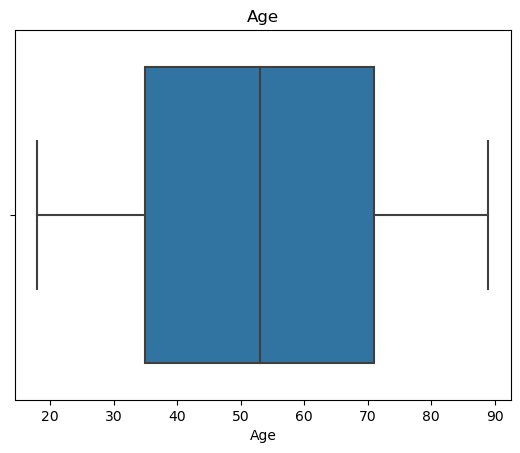

In [26]:
#Detect outliers in Age variable
population_boxplot = sns.boxplot(x="Age", data = df_churn).set_title("Age")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Age'])

Q1: 0.0
Q3: 3.0
IQR: 3.0
Lower Whisker: -4.5
Upper Whisker: 7.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 401
Total number of Outliers: 401
Maximum Value: 10
Minimum Value: 0


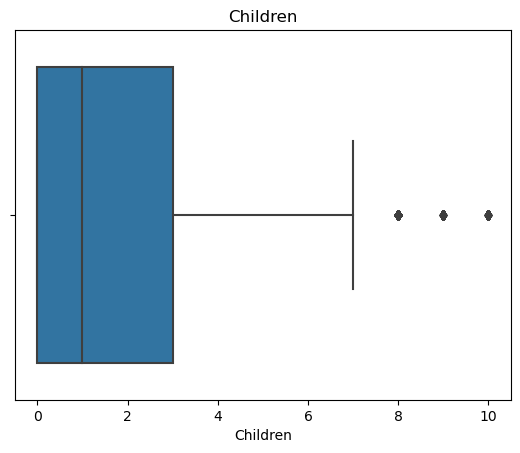

In [27]:
#Detect outliers in Children variable
population_boxplot = sns.boxplot(x="Children", data = df_churn).set_title("Children")

#Generate boxplot info for Children using boxplot_info function
boxplot_info(df_churn['Children'])

Q1: 19224.7175
Q3: 53246.17
IQR: 34021.4525
Lower Whisker: -31807.46125
Upper Whisker: 104278.34875
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 336
Total number of Outliers: 336
Maximum Value: 258900.7
Minimum Value: 348.67


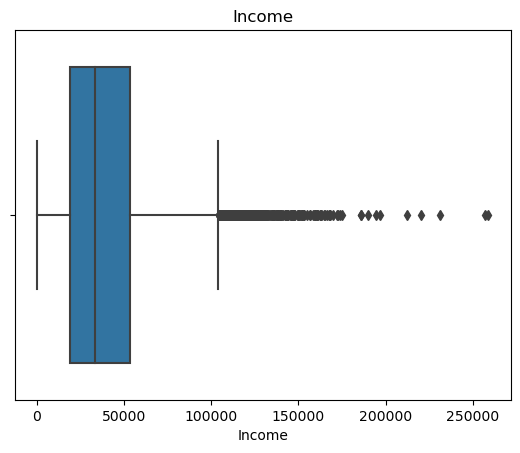

In [28]:
#Generate boxplot for Income variable
income_boxplot = sns.boxplot(x="Income", data = df_churn).set_title("Income")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Income'])

Q1: 10.0
Q3: 14.0
IQR: 4.0
Lower Whisker: 4.0
Upper Whisker: 20.0
Number of outliers lower than boxplot minimum: 23
Number of outliers greater than boxplot maximum: 15
Total number of Outliers: 38
Maximum Value: 23
Minimum Value: 1


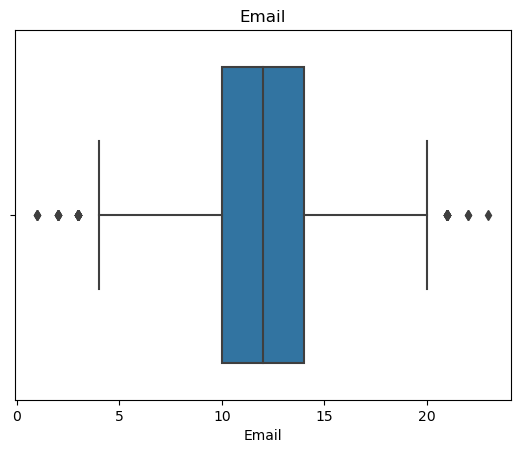

In [29]:
#Generate boxplot for Email variable
email_boxplot = sns.boxplot(x="Email", data = df_churn).set_title("Email")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Email'])

Q1: 8.018214
Q3: 11.969485
IQR: 3.951271
Lower Whisker: 2.0913075
Upper Whisker: 17.8963915
Number of outliers lower than boxplot minimum: 33
Number of outliers greater than boxplot maximum: 43
Total number of Outliers: 76
Maximum Value: 21.20723
Minimum Value: 0.09974694


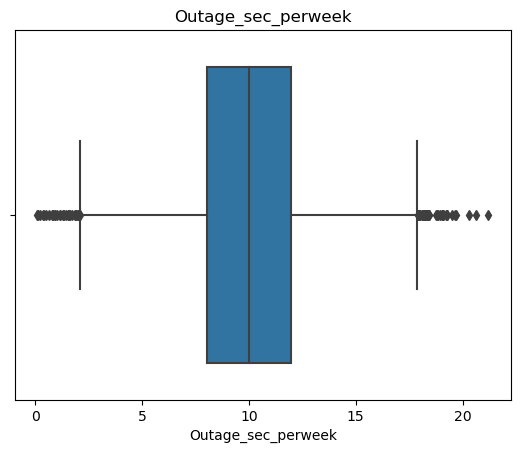

In [30]:
#Generate boxplot for Outage_sec_perweek variable
outage_boxplot = sns.boxplot(x="Outage_sec_perweek", data = df_churn).set_title("Outage_sec_perweek")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Outage_sec_perweek'])

Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Whisker: -1.5
Upper Whisker: 2.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 94
Total number of Outliers: 94
Maximum Value: 6
Minimum Value: 0


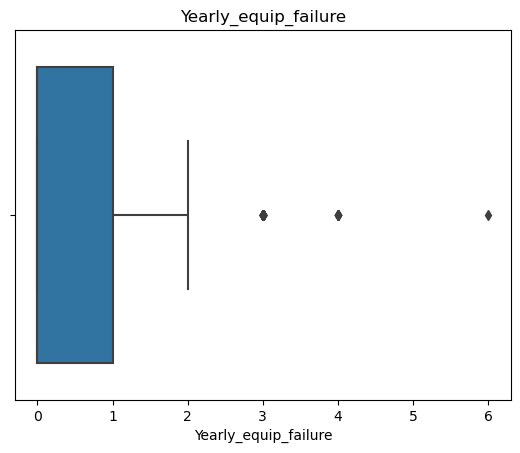

In [31]:
#Generate boxplot for Yearly_equip_failure variable
email_boxplot = sns.boxplot(x="Yearly_equip_failure", data = df_churn).set_title("Yearly_equip_failure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Yearly_equip_failure'])

Q1: 7.91769359175
Q3: 61.479795
IQR: 53.56210140825
Lower Whisker: -72.42545852062501
Upper Whisker: 141.822947112375
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 71.99928
Minimum Value: 1.00025934


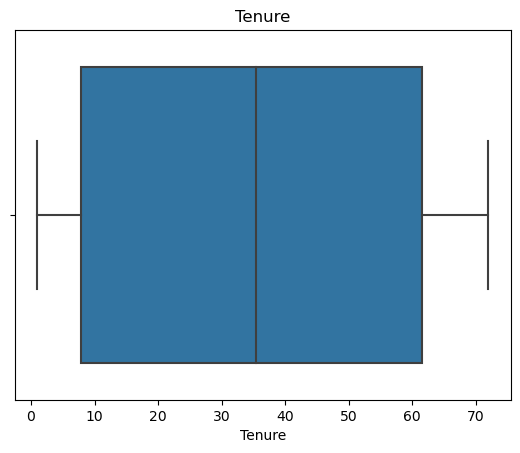

In [32]:
#Generate boxplot for Tenure variable
email_boxplot = sns.boxplot(x="Tenure", data = df_churn).set_title("Tenure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Tenure'])

Q1: 139.979239
Q3: 200.734725
IQR: 60.75548599999999
Lower Whisker: 48.84601000000002
Upper Whisker: 291.867954
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 290.160419
Minimum Value: 79.97886


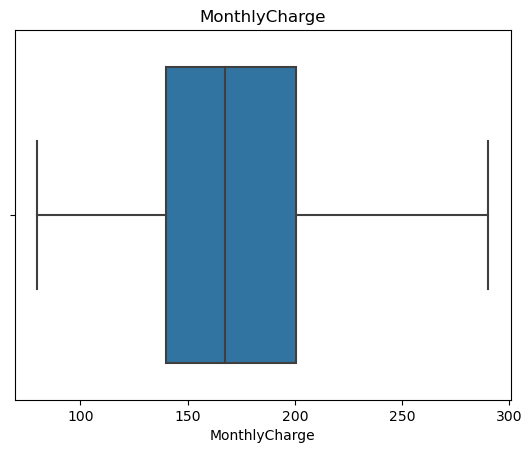

In [33]:
#Generate boxplot for MonthlyCharge variable
email_boxplot = sns.boxplot(x="MonthlyCharge", data = df_churn).set_title("MonthlyCharge")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['MonthlyCharge'])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Following the data cleaning step, I decided to re-express my categorical variables numerically.  This was necessary to ensure that they would be compatible with my K-Nearest Neighbors algorithm.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To re-express the variables "Churn", "Techie", and "TechSupport", I used ordinal encoding.  This was done because these variables have values of "Yes" and "No", which can be reinterpreted as 1 and 0.  I started off by creating a unique dictionary for each variable.  I created "dict_churn" for "Churn, "dict_techie" for "Techie", and "dict_techsupport" for "TechSupport".  Each dictionary assigns a value of 1 to "Yes" and 0 to "No".  I then used the "replace()" method from pandas on df_churn and passed the dictionaries as parameters.  This replaced the existing "Yes" and "No" values for each variable with 1 and 0.  I then printed the unique values of "Churn", "Techie", and "TechSupport" to confirm they had been successfully re-expressed as numbers.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I chose to re-express the variables "Gender", "Contract", and "InternetService" using one-hot encoding.  This was done because their values represent labels rather than a particular order.  To do this, I used the "get_dummies()" method from pandas on each of the variables, which created a new dataframe containing the dummy variables.  The dummy variables for "Gender" were called "Male", "Female", and "Nonbinary" and assigned to the dataframe "df_gender".  The dummy variables for "Contract" were called "Contract_month-to-month", "Contract_One year", and "Contract_Two Year" and assigned to the dataframe "df_contract".  The dummy variables for "InternetService" were called "Internet_DSL", "Internet_Fiber Optic", and "Internet_None" and assigned to the dataframe "df_internet".  Because all of these dataframes contained boolean values, I used the "astype()" method to change them to integers (1 and 0).  The last step I took was to join "df_gender", "df_contract", and "df_internet" back to "df_churn".

In [34]:
#Re-express Churn as numeric using ordinal encoding

#Find unique values of variable
print(df_churn["Churn"].unique())

#Create dictionary to store numeric values for variable
dict_churn = {"Churn":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_churn, inplace=True)

#Confirm categorical values have been replaced
print(df_churn["Churn"].unique())

['No' 'Yes']
[0 1]


In [35]:
#Re-express Gender as numeric using one-hot encoding

#Use pd.get_dummies to turn Gender variable into 3 dummy variables
df_gender = pd.get_dummies(df_churn["Gender"])

#Change data type of dummy variables from boolean to fload
df_gender = df_gender.astype(int)

#Join dummy variables to df_churn
print(df_gender)
df_churn = df_churn.join(df_gender)

      Female  Male  Nonbinary
0          0     1          0
1          1     0          0
2          1     0          0
3          0     1          0
4          0     1          0
...      ...   ...        ...
9995       0     1          0
9996       0     1          0
9997       1     0          0
9998       0     1          0
9999       0     1          0

[10000 rows x 3 columns]


In [36]:
#Re-express Techie as numeric using ordinal encoding

#Find unique values of  variable
print(df_churn["Techie"].unique())

#Create dictionary to store numeric values for variable
dict_techie = {"Techie":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_techie, inplace=True)

#Confirm categorical values have been replaced
print(df_churn["Techie"].unique())

['No' 'Yes']
[0 1]


In [37]:
#Re-express Contract as numeric using one-hot encoding

#Print unique values of Contract
print(df_churn["Contract"].unique())

#Use pd.get_dummies to turn Contract variable into 3 dummy variables
df_contract = pd.get_dummies(df_churn["Contract"], prefix="Contract")

#Change data type of dummy variables from boolean to float
df_contract = df_contract.astype(int)

#Join dummy variables to df_churn
print(df_contract)
df_churn = df_churn.join(df_contract)

['One year' 'Month-to-month' 'Two Year']
      Contract_Month-to-month  Contract_One year  Contract_Two Year
0                           0                  1                  0
1                           1                  0                  0
2                           0                  0                  1
3                           0                  0                  1
4                           1                  0                  0
...                       ...                ...                ...
9995                        1                  0                  0
9996                        0                  0                  1
9997                        1                  0                  0
9998                        0                  0                  1
9999                        1                  0                  0

[10000 rows x 3 columns]


In [38]:
#Re-express InternetService as numeric using one-hot encoding

#Print unique values of InternetService
print(df_churn["InternetService"].unique())

#Use pd.get_dummies to turn InternetService variable into 3 dummy variables
df_service = pd.get_dummies(df_churn["InternetService"], prefix="Internet")

#Change data type of dummy variables from boolean to float
df_service = df_service.astype(int)

#Join dummy variables to df_churn
print(df_service)
df_churn = df_churn.join(df_service)

['Fiber Optic' 'DSL' 'None']
      Internet_DSL  Internet_Fiber Optic  Internet_None
0                0                     1              0
1                0                     1              0
2                1                     0              0
3                1                     0              0
4                0                     1              0
...            ...                   ...            ...
9995             1                     0              0
9996             0                     1              0
9997             0                     1              0
9998             0                     1              0
9999             0                     1              0

[10000 rows x 3 columns]


In [39]:
#Re-express TechSupport as numeric using ordinal encoding

#Find unique values of  variable
print(df_churn["TechSupport"].unique())

#Create dictionary to store numeric values for variable
dict_techsupport = {"TechSupport":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_techsupport, inplace=True)

#Confirm categorical values have been replaced
print(df_churn["TechSupport"].unique())

['No' 'Yes']
[0 1]


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After re-expressing my categorical variables I decided to rename some of them to make them more consistent and easier to interpret.  "Contract_Month-to-month" was renamed "Contract_Monthly".  "Contract_One year" was renamed "Contract_One_Year".  "Contract_Two Year" was renamed "Contract_Two_Year".  "Internet_Fiber Optic" was renamed "Internet_Fiber_Optic".  Lastly, "Item1", "Item2", "Item3", and "Item4" were renamed "Responses", "Fixes", "Replacements", and "Reliability".  This was done using the "rename()" method on "df_churn".

In [40]:
#Rename Item columns in df_churn 
df_churn = df_churn.rename(columns = {"Contract_Month-to-month":"Contract_Monthly","Contract_One year":"Contract_One_Year","Contract_Two Year":"Contract_Two_Year","Internet_Fiber Optic":"Internet_Fiber_Optic","Item1":"Responses","Item2":"Fixes","Item3":"Replacements","Item4":"Reliability"})

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Before scaling my data, I decided to check for correlation within my variables.  To do this, I grouped my quantitative and qualitative variables and generated heatmaps for both sets using the seaborn "heatmap()" method.  I decided that I would remove any variable with a pearson coefficient of less than -0.7 or greater than 0.7.  Based on the results of the heatmap, I removed the variable "Female', which had a coefficient of -0.95 with "Male".

<Axes: >

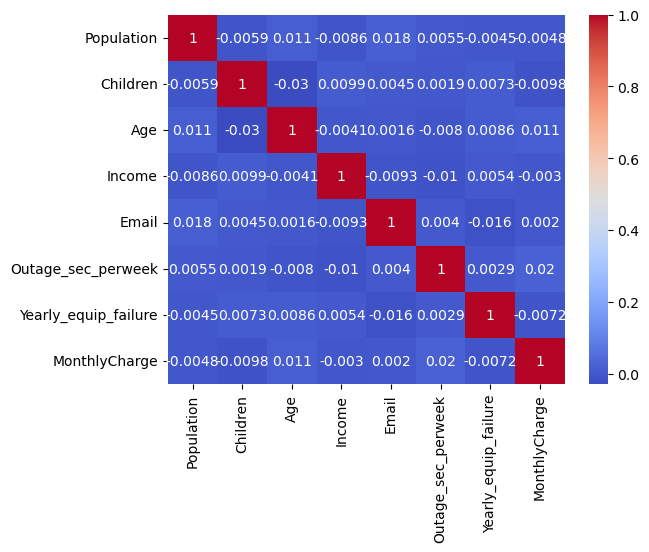

In [41]:
#Check for correlation between quantitative variables
sns.heatmap(data=df_churn[["Population","Children","Age","Income","Email","Outage_sec_perweek","Yearly_equip_failure","MonthlyCharge"]].corr(),annot=True, cmap="coolwarm")

<Axes: >

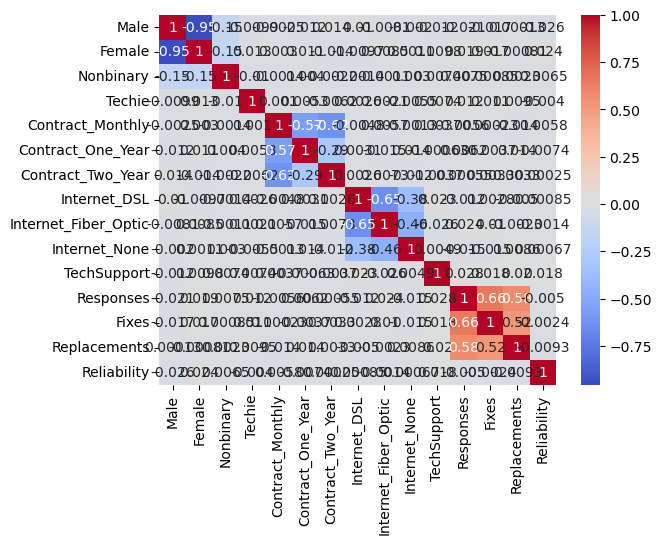

In [42]:
#Check for correlation between qualitative variables
sns.heatmap(data=df_churn[["Male","Female","Nonbinary","Techie","Contract_Monthly","Contract_One_Year","Contract_Two_Year","Internet_DSL","Internet_Fiber_Optic","Internet_None","TechSupport","Responses","Fixes","Replacements","Reliability"]].corr(), annot=True, cmap="coolwarm")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step I took in preprocessing the data was to scale my continuous variables.  This step is essential because the variables have different ranges of values which can greatly impact the results of the analysis.  Scaling ensures that no single feature dominates calculations in the KNN algorithm (Khoong, 2023).  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To begin, I assigned the continuous variables "Population", "Children", "Age", "Income", "Email", "Outage_sec_perweek", "Yearly_equip_failure", and "MonthlyCharge" to the variable "churn_cont".  I then used the "StandardScaler()" method to fit and transform the features.  The newly scaled variables were then assigned to "churn_cont_std".  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;My categorical features were kept in a separate variable called "churn_pred" because they did not need to be scaled.  I assigned my dependent variable "Churn" to "churn_resp" for the same reason.

After scaling was complete I joined "churn_resp", "churn_pred", and "churn_cont_std" in a new dataframe called "churn_std".

In [43]:
#Scale independent variables
scaler = StandardScaler()

#Assign independent variables to churn_pred and scale using StandardScaler().fit_transform
churn_cont = df_churn[["Population","Children","Age","Income","Email","Outage_sec_perweek","Yearly_equip_failure","MonthlyCharge"]]
churn_cont_std = pd.DataFrame(scaler.fit_transform(churn_cont), columns = churn_cont.columns)

#Assign independent categorical variables to churn_pred
churn_pred = df_churn[["Male","Nonbinary","Techie","Contract_Monthly","Contract_One_Year","Contract_Two_Year","Internet_DSL","Internet_Fiber_Optic","Internet_None","TechSupport","Responses","Fixes","Replacements","Reliability"]]

#Assign dependent variable to churn_resp
churn_resp = df_churn["Churn"]

#Assign continuous/categorical features and dependent variable to frames 
frames = [churn_resp, churn_pred, churn_cont_std]

#Rejoin all variables to dataframe churn_std
churn_std = pd.concat(frames, axis=1)
churn_std.head()

,Churn,Male,Nonbinary,Techie,Contract_Monthly,Contract_One_Year,Contract_Two_Year,Internet_DSL,Internet_Fiber_Optic,Internet_None,...,Replacements,Reliability,Population,Children,Age,Income,Email,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge
0,0,1,0,0,0,1,0,0,1,0,...,5,3,-0.673405,-0.972338,0.720925,-0.398778,-0.666282,-0.679978,0.946658,-0.003943
1,1,0,0,1,1,0,0,0,1,0,...,3,3,0.047772,-0.506592,-1.259957,-0.641954,-0.005288,0.570331,0.946658,1.630326
2,0,0,0,1,0,0,1,1,0,0,...,2,4,-0.417238,0.890646,-0.148730,-1.070885,-0.996779,0.252347,0.946658,-0.295225
3,0,1,0,1,0,0,1,1,0,0,...,4,2,0.284537,-0.506592,-0.245359,-0.740525,0.986203,1.650506,-0.625864,-1.226521
4,1,1,0,0,1,0,0,0,1,0,...,4,3,0.110549,-0.972338,1.445638,0.009478,1.316700,-0.623156,0.946658,-0.528086


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With the data now scaled, I moved onto the feature selection step of my preprocessing plan.  I assigned all of my selected independent variables to a variable called "X", and my response variable "Churn" to a variable called "y".  I then used the "SelectKBest()" method from scikit-learn to select the best features.  I passed "f_classif" as the scoring function to compute the ANOVA f-value for each of the variables.  I then fit and transformed the "SelectKBest()" method around my variables.  


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I ultimately chose to keep statistically significant features with p-values less than 0.05.  This left me with the variables "MonthlyCharge", "Contract_Monthly", "Contract_Two_Year", "Contract_One_Year", "Internet_DSL", "Internet_Fiber_Optic", "Internet_None", "Techie", and "Male". 

In [44]:
#Assign independent variables to X, and dependent variable to y
X = df_churn[["Male","Nonbinary","Techie","Contract_Monthly","Contract_One_Year","Contract_Two_Year","Internet_DSL","Internet_Fiber_Optic","Internet_None","TechSupport","Responses","Fixes","Replacements","Reliability","Population","Children","Age","Income","Email","Outage_sec_perweek","Yearly_equip_failure","MonthlyCharge"]]
y = df_churn["Churn"]

#Use SelectKBest method to determine most statistically significant features for model
feature_names = X.columns
skbest = SelectKBest(score_func=f_classif, k='all')
X_new = skbest.fit_transform(X, y)
X_new.shape

#Keep features with p-value < .05 and assign to variable "features_to_keep"
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]

,Feature,p_value
21,MonthlyCharge,0.000000e+00
3,Contract_Monthly,1.236727e-163
5,Contract_Two_Year,3.019204e-72
4,Contract_One_Year,2.359068e-44
6,Internet_DSL,7.391267e-21
2,Techie,2.408802e-11
7,Internet_Fiber_Optic,4.873098e-09
8,Internet_None,1.599912e-04
0,Male,5.011402e-03


## C4. 

Provide a copy of the cleaned data set.

I have attached a copy of my cleaned data in a file called "churn_preprocessed.csv".

In [45]:
#Export to csv file
churn_std.to_csv("churn_preprocessed.csv")

## D1. 

Split the data into training and test data sets and provide the file(s).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the data has been preprocessed, it is ready to be split into testing and training subsets.  I started by assigning the independent features to a variable called "X", and the dependent variable to "Y".  I then used the "train_test_split()" method from scikit-learn and passed "X" and "Y" as parameters.  I chose to split the data into 80% training and 20% testing subsets.  The subsets have been exported in the files "X_train.csv", "Y_train.csv", "X_test.csv", and "Y_test.csv".

In [46]:
#Assign independent variables to X and dependent variable to Y
X = churn_std[["Contract_Monthly","Contract_One_Year","Contract_Two_Year","Internet_DSL","Techie","Internet_Fiber_Optic","Internet_None","Male","MonthlyCharge"]]
Y = churn_std["Churn"]

#Split data using the train_test_split method
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size=0.2, random_state=15, stratify=y)

#Export train and test data to respective .csv files
X_train.to_csv("X_train.csv")
Y_train.to_csv("Y_train.csv")
X_test.to_csv("X_test.csv")
Y_test.to_csv("Y_test.csv")

## D2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first step I took in performing the analysis was to develop the initial KNN model.  I used a variety of different methods from the scikit-learn library to generate model performance metrics.  I instantiated my model by using the "KNeighborsClassifier()" method and assigning it to a variable called "knn".  I then used the "fit()" method to fit the model to the training data subsets (X_train and Y_train).  I generated predictions using the "predict()" method on "knn".  The initial model has no specified parameters, which means that K-neighbors has a value of 5 by default (Scikit-learn documentation).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To compare my model's results to the actual churn values, I created a confusion matrix using the "confusion_matrix()" method from scikit-learn.  This would allow me to calculate accuracy, sensitivity, and specificity scores.  Additionally, I created used the "classification_report()" method on the test data to generate performance metrics.  

In [47]:
#Build initial KNN Model and fit to training data 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

#Generate predictions using test data
Y_pred = knn.predict(X_test)

#Generate matrix to compare test results to predicted results and check accuracy of model.  
matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)
print(classification_report(Y_test, Y_pred))

[[1299  171]
 [ 302  228]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1470
           1       0.57      0.43      0.49       530

    accuracy                           0.76      2000
   macro avg       0.69      0.66      0.67      2000
weighted avg       0.75      0.76      0.75      2000



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using the confusion matrix above, I was able to calculate the accuracy score of the initial model.  Accuracy was calculated by adding the number of true positives and true negatives and then dividing by the sum by the total number of values in the matrix.  According to the calculations, the initial KNN model had an accuracy score of .7635.  This score represents the percentage of cases that the model was able to correctly predict customer churn. 

In [48]:
#Calculate total of performance matrix values
total = matrix[0,0] + matrix[1,0] + matrix[0,1] + matrix[1,1]

#Calculate accuracy of model: (True Positives + True Negatives) / Total
accuracy = (matrix[0,0] + matrix[1,1])/total
print("Accuracy: " + str(accuracy))

#Calculate sensitivity of model: True Positives / (True Positives + False Negatives)
sensitivity = matrix[1,1] / (matrix[1,1] + matrix[1,0])
print("Sensitivity: " + str(sensitivity))
      
#Calculate specificity of model: True Negatives / (True Negatives + False Positives)
specificity = matrix[0,0] / (matrix[0,0] + matrix[0,1])
print("Specificity: " + str(specificity))

Accuracy: 0.7635
Sensitivity: 0.43018867924528303
Specificity: 0.8836734693877552


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step I performed in the analysis was to generate an ROC (Receiver Operating Characteristic) curve.  The purpose of the ROC curve is to compare the true positive rate to the false positive rate at various threshold settings (Dash, 2022).  I started off by using the scikit-learn "predict_proba()" method to predict the probability of customer churn according to my initial knn model.  This probability was assigned to the variable "Y_pred_prob".  I then used the "roc_curve()" method from sklearn to compare my the test values of "Churn" (Y_test) to the predicted values (Y_pred_prob).  I plotted the ROC curve using the "plot()" method from the matplotlib library.

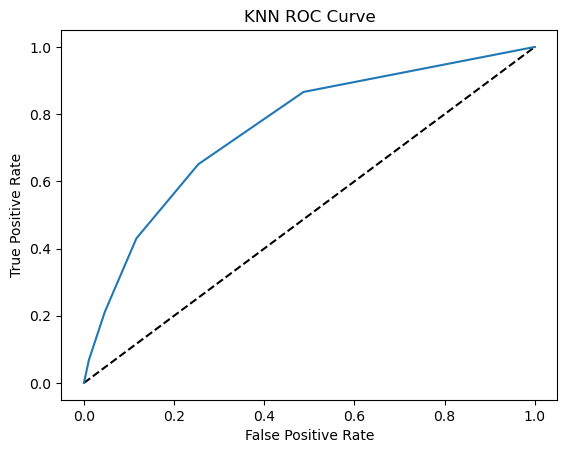

In [49]:
#Initial ROC Curve
Y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = "KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After generating the ROC curve, the next step was to calculate the area under the curve (AUC). The AUC score was calculated using the "roc_auc_score()" method from scikit-learn.  This method performed the AUC calculations by comparing the test values and predicted values of "churn" as parameters.  The output below shows an AUC score of approximately 0.7576.

In [50]:
#Calculate initial AUC score
auc = roc_auc_score(Y_test, Y_pred_prob)
print('AUC: ' + str(auc))

AUC: 0.7576151970222051


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With the initial model calculations now complete, it was time to perform hyperparameter tuning to optimize the model.  I started off by creating a parameter grid which contained unique values for the parameters "n_neighbors", "metric", and "weights".  The parameter "n_neighbors" contains the range of potential K-values for the model, and represents the number of neighbors a given value will be compared to during classification (IBM).  I chose to search for the optimal number of neighbors between 10 and 200 in increments of 5.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The "metric" parameter contains the values "manhattan" and "euclidean", which are different ways of measuring distance between points.  Manhattan distance calculates distance between two points in a grid-like path, while euclidean distance is measured as a straight line between two points (Gohrani, 2019).  The accuracy of the model can be influenced depending on the metric used.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The "weights" parameter contains the values "uniform" and "distance".  According to the sklearn documentation, "uniform" value indicates that all points in each neighborhood are weight equally.  "Distance" indicates that closer neighbors of a query point will have a greater influence than neighbors which are further away.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After selecting the parameters I wanted to optimize, I used the "GridSearchCV" method with the knn model and parameter grid as parameters.  I also specified a value of 10 for "cv" to perform 10-fold cross-validation.  The resulting output was assigned to the variable "knn_cv".  I used the "fit()" method to fit "knn_cv" using my training data and then printed the best parameters.  The results show that the optimal distance metric is euclidean, and the optimal number of K-neighbors is 105, and the optimal weight measurement is "uniform". The best score for the model is .780375.

In [51]:
#[In-text citation: (D209 T1 Building KNN in Python Med)]

#Create parameter grid prior to hyperparameter tuning
param_grid = {
    "n_neighbors": np.arange(10, 200, 5), 
    "metric": ["manhattan", "euclidean"],
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier()

#Perform hyperparameter tuning with 10 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X_train, Y_train)

#Print best parameters and best score
print("Best Parameters: ", knn_cv.best_params_)
print("Best Score: ", knn_cv.best_score_)

Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 105, 'weights': 'uniform'}
Best Score:  0.7816249999999999


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After determining the best values for each parameter, it was time to revisit the initial model.  This time, I made sure to specify "n_neighbors" as 105.  I also selected a value of 2 for "p" in order to specify euclidean distance as the preferred measurement.  Lastly, I set the weight metric to "uniform" according to the best parameter results.  I followed the same process as before, generating a new set of predictions for the knn model as well as a new confusion matrix and classification report.  Using the best parameters, the new model was able to achieve an accuracy score of .79. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Additionally, I generated another ROC curve and calculated the AUC for the updated model.  This time, the model achieved an AUC score of .82057.  In section E1, I will go into greater detail regarding the accuracy and AUC scores of the tuned model.

In [52]:
#Build new KNN Model with k-value of 105 and fit to data
knn = KNeighborsClassifier(n_neighbors = 105, p=2, weights="uniform")
knn.fit(X_train, Y_train)

#Generate predictions using test data
Y_pred = knn.predict(X_test)

#Generate matrix to compare test results to predicted results and check accuracy of model.  
matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)
print(classification_report(Y_test, Y_pred))

[[1380   90]
 [ 330  200]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1470
           1       0.69      0.38      0.49       530

    accuracy                           0.79      2000
   macro avg       0.75      0.66      0.68      2000
weighted avg       0.78      0.79      0.77      2000



In [53]:
#Calculate total of performance matrix values
total = matrix[0,0] + matrix[1,0] + matrix[0,1] + matrix[1,1]

#Calculate accuracy of model: (True Positives + True Negatives) / Total
accuracy = (matrix[0,0] + matrix[1,1])/total
print("Accuracy: " + str(accuracy))

#Calculate sensitivity of model: True Positives / (True Positives + False Negatives)
sensitivity = matrix[1,1] / (matrix[1,1] + matrix[1,0])
print("Sensitivity: " + str(sensitivity))
      
#Calculate specificity of model: True Negatives / (True Negatives + False Positives)
specificity = matrix[0,0] / (matrix[0,0] + matrix[0,1])
print("Specificity: " + str(specificity))

Accuracy: 0.79
Sensitivity: 0.37735849056603776
Specificity: 0.9387755102040817


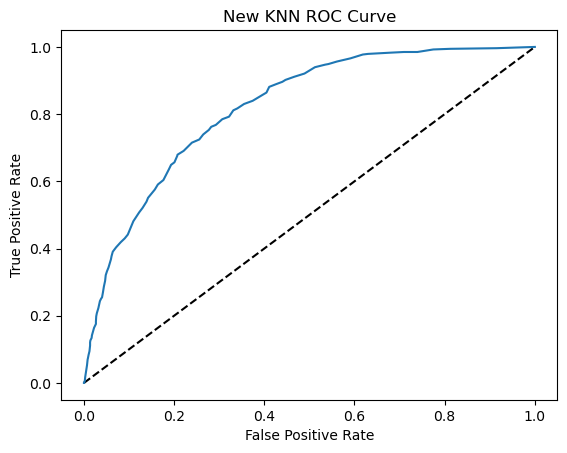

In [54]:
#New ROC Curve
Y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = "KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("New KNN ROC Curve")
plt.show()

In [55]:
#Calculate new AUC score
auc_new = roc_auc_score(Y_test, Y_pred_prob)
print('AUC: ' + str(auc_new))

AUC: 0.8205750224618149


## D3.  

This section contains the same code used for the analysis in D2.  

In [56]:
#Build initial KNN Model and fit to training data 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

#Generate predictions using test data
Y_pred = knn.predict(X_test)

#Generate matrix to compare test results to predicted results and check accuracy of model.  
matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)
print(classification_report(Y_test, Y_pred))

[[1299  171]
 [ 302  228]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1470
           1       0.57      0.43      0.49       530

    accuracy                           0.76      2000
   macro avg       0.69      0.66      0.67      2000
weighted avg       0.75      0.76      0.75      2000



In [57]:
#Calculate total of performance matrix values
total = matrix[0,0] + matrix[1,0] + matrix[0,1] + matrix[1,1]

#Calculate accuracy of model: (True Positives + True Negatives) / Total
accuracy = (matrix[0,0] + matrix[1,1])/total
print("Accuracy: " + str(accuracy))

#Calculate sensitivity of model: True Positives / (True Positives + False Negatives)
sensitivity = matrix[1,1] / (matrix[1,1] + matrix[1,0])
print("Sensitivity: " + str(sensitivity))
      
#Calculate specificity of model: True Negatives / (True Negatives + False Positives)
specificity = matrix[0,0] / (matrix[0,0] + matrix[0,1])
print("Specificity: " + str(specificity))

Accuracy: 0.7635
Sensitivity: 0.43018867924528303
Specificity: 0.8836734693877552


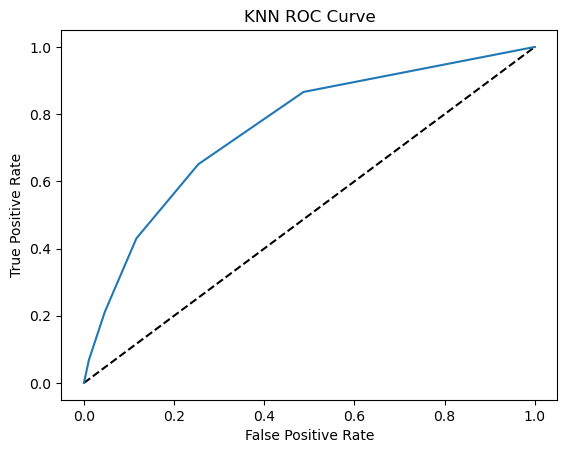

In [58]:
#Initial ROC Curve
Y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = "KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.show()

In [59]:
#Calculate initial AUC score
auc = roc_auc_score(Y_test, Y_pred_prob)
print('AUC: ' + str(auc))

AUC: 0.7576151970222051


In [60]:
#[In-text citation: (D209 T1 Building KNN in Python Med)]

#Create parameter grid prior to hyperparameter tuning
param_grid = {
    "n_neighbors": np.arange(10, 200, 5), 
    "metric": ["manhattan", "euclidean"],
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier()

#Perform hyperparameter tuning with 10 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X_train, Y_train)

#Print best parameters and best score
print("Best Parameters: ", knn_cv.best_params_)
print("Best Score: ", knn_cv.best_score_)

Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 105, 'weights': 'uniform'}
Best Score:  0.7816249999999999


In [61]:
#Build new KNN Model with k-value of 105 and fit to data
knn = KNeighborsClassifier(n_neighbors = 105, p=2, weights="uniform")
knn.fit(X_train, Y_train)

#Generate predictions using test data
Y_pred = knn.predict(X_test)

#Generate matrix to compare test results to predicted results and check accuracy of model.  
matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)
print(classification_report(Y_test, Y_pred))

[[1380   90]
 [ 330  200]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1470
           1       0.69      0.38      0.49       530

    accuracy                           0.79      2000
   macro avg       0.75      0.66      0.68      2000
weighted avg       0.78      0.79      0.77      2000



In [62]:
#Calculate total of performance matrix values
total = matrix[0,0] + matrix[1,0] + matrix[0,1] + matrix[1,1]

#Calculate accuracy of model: (True Positives + True Negatives) / Total
accuracy = (matrix[0,0] + matrix[1,1])/total
print("Accuracy: " + str(accuracy))

#Calculate sensitivity of model: True Positives / (True Positives + False Negatives)
sensitivity = matrix[1,1] / (matrix[1,1] + matrix[1,0])
print("Sensitivity: " + str(sensitivity))
      
#Calculate specificity of model: True Negatives / (True Negatives + False Positives)
specificity = matrix[0,0] / (matrix[0,0] + matrix[0,1])
print("Specificity: " + str(specificity))

Accuracy: 0.79
Sensitivity: 0.37735849056603776
Specificity: 0.9387755102040817


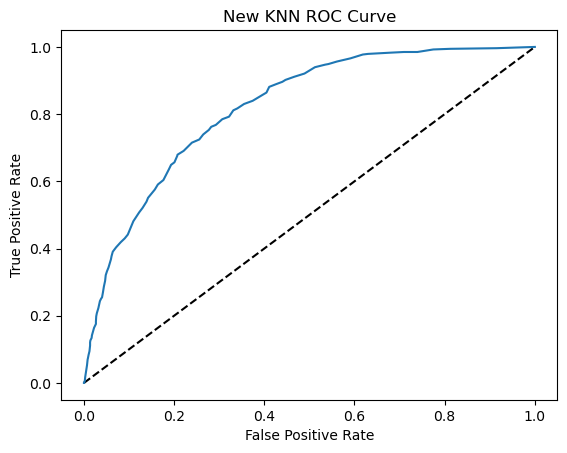

In [63]:
#New ROC Curve
Y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = "KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("New KNN ROC Curve")
plt.show()

In [64]:
#Calculate new AUC score
auc_new = roc_auc_score(Y_test, Y_pred_prob)
print('AUC: ' + str(auc_new))

AUC: 0.8205750224618149


## E1.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I was able to obtain the accuracy score of the tuned model using a confusion matrix.  Accuracy represents the percentage of cases that the model was able to make a correct prediction (Kundu, 2022).  I obtained the accuracy score by calculating the sum of true positives and true negatives and then dividing it by the total number of values in the matrix.  From the calculations in D2, we can see that the model achieved an accuracy score of about 0.79.  This means that it was able to correctly classify 79% of cases.   

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis also showed that the model achieved an AUC score of about .8204.  This metric represents the ability of the model to correctly distinguish between positive and negative classes (Dash, 2022).  This means that the model was able to correctly distinguish between churned and retained customers in 82.06% of cases. 

## E2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on the results of analysis we can make a few conclusions regarding the final knn algorithm.  The accuracy score of .789 indicates that the model is reasonably good at making predictions.  Typically, a company can consider any model with an accuracy score greater than 70% a reliable model (Hendricks).  The AUC score of .8204 also confirms this conclusion.  A model that selects at random would have an AUC score of 0.5, which means that model achieved significantly better results.  Based on the metrics, the KNN model demonstrated moderate performance.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Apart from the accuracy metrics, I took note of the low sensitivity score of 0.3773.  The sensitivity score was calculated by dividing the number of true positives by the sum of true positives and false negatives.  This means that the model only predicted 37.73% of all positive instances of churn.  This certainly raises some questions about the reliability of the model.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the results of the feature selection process, we are also able to answer the question posed at the beginning of the analysis.  The output of the "SelectKBest()" method shows us that “MonthlyCharge”, “Contract_Monthly”, “Contract_Two_Year”, “Internet_DSL”, “Techie”, “Internet_Fiber_Optic”, “Internet_None”, “Male”, and “Female” are the most important factors in predicting customer churn.  These variables all have p-values less than .05, which means they have a strong relationship with the dependent variable.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, we can also see that hyperparameter tuning played a positive role on the accuracy and AUC of the model.  The initial KNN model had an accuracy score of .7635 and an AUC score of .7576.  After obtaining and using the best parameters, these metrics improved to .79 and .8208, respectively.  It's possible that additional hyperparameter tuning would improve these results even further.

## E3. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One limitation of this analysis is the lack of balance in the values of the dependent variable.  Out of 10,000 observations, only 2,650 customers were churned.  The lack of equal distribution of responses might have negatively impacted the accuracy of the knn model.  It's possible that the model might have learned to predict accurately by simply picking the majority class of "Yes" (Hvilsoj, 2022).  A more balanced dataset could have a positive impact on the results of the knn model.

## E4. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Although the model has demonstrated moderate accuracy as noted in E2, I doubt that it could be successfully applied in the real world.  Most of the variables used to predict churn seem to be related to each other, as they are dummies originating from the same categorical variables.  This makes it somewhat difficult to  understand how to influence customer churn habits.  The only variables that provide real insight are "MonthlyCharge" and "Techie", in my opinion.  Ultimately, this model is just not practical.

&nbsp;&nbsp;&nbsp;&nbsp;I think it would be a good idea for the telecommunications company to collect data on a wider range of variables.  Additional continuous variables could prove beneficial in providing a more accurate analysis.  It might be worthwhile to investigate how long and how much their customers are paying for competing services.

## F.  

Please see the link to the panopto recording below. 

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=54314a12-e3cf-45a5-8a76-b129004ced35

## G. 

D209 T1 Building KNN in Python Med. Narrated by Festus Elleh wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=33a63ab2-3d64-48b2-af4a-b11b0124c03f. 

## H. 

Harrison, O. (2018, September 10). Machine Learning Basics with the K-Nearest Neighbors Algorithm. Towards Data Science. https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

Hendricks, R. (n.d.). What is a good accuracy score in Machine Learning?. DeepChecks. https://deepchecks.com/question/what-is-a-good-accuracy-score-in-machine-learning/

Khoong, W. (2023, January 21). Why Scaling Your Data Is Important. Medium. https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

sklearn.neighbors.KNeighborsClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Dash, S. (2022, October 19). Understanding the ROC and AUC Intuitively. Medium. https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02

Gohrani, K. (2019, November 10). Different Types of Distance Metrics used in Machine Learning. Medium. https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7

Nahm, F. S. (2022, January 18). Receiver operating characteristic curve: overview and practical use for clinicians. Korean J Anesthesiol, 75(1). https://doi.org/10.4097/kja.21209